In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.animation import FuncAnimation, writers

import seaborn as sns
sns.set_style("whitegrid")

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

import warnings
warnings.filterwarnings("ignore")

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [15]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [17]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [18]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [19]:
df['Country'].value_counts()

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

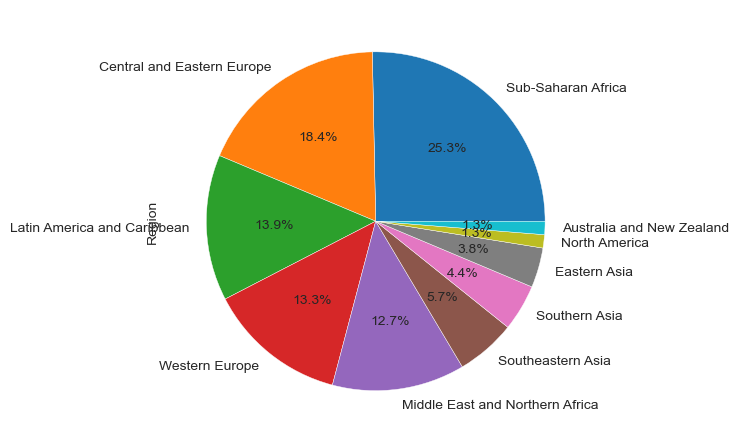

In [20]:
df['Region'].value_counts().plot(kind='pie',autopct='%1.1f%%');
df['Region'].value_counts()

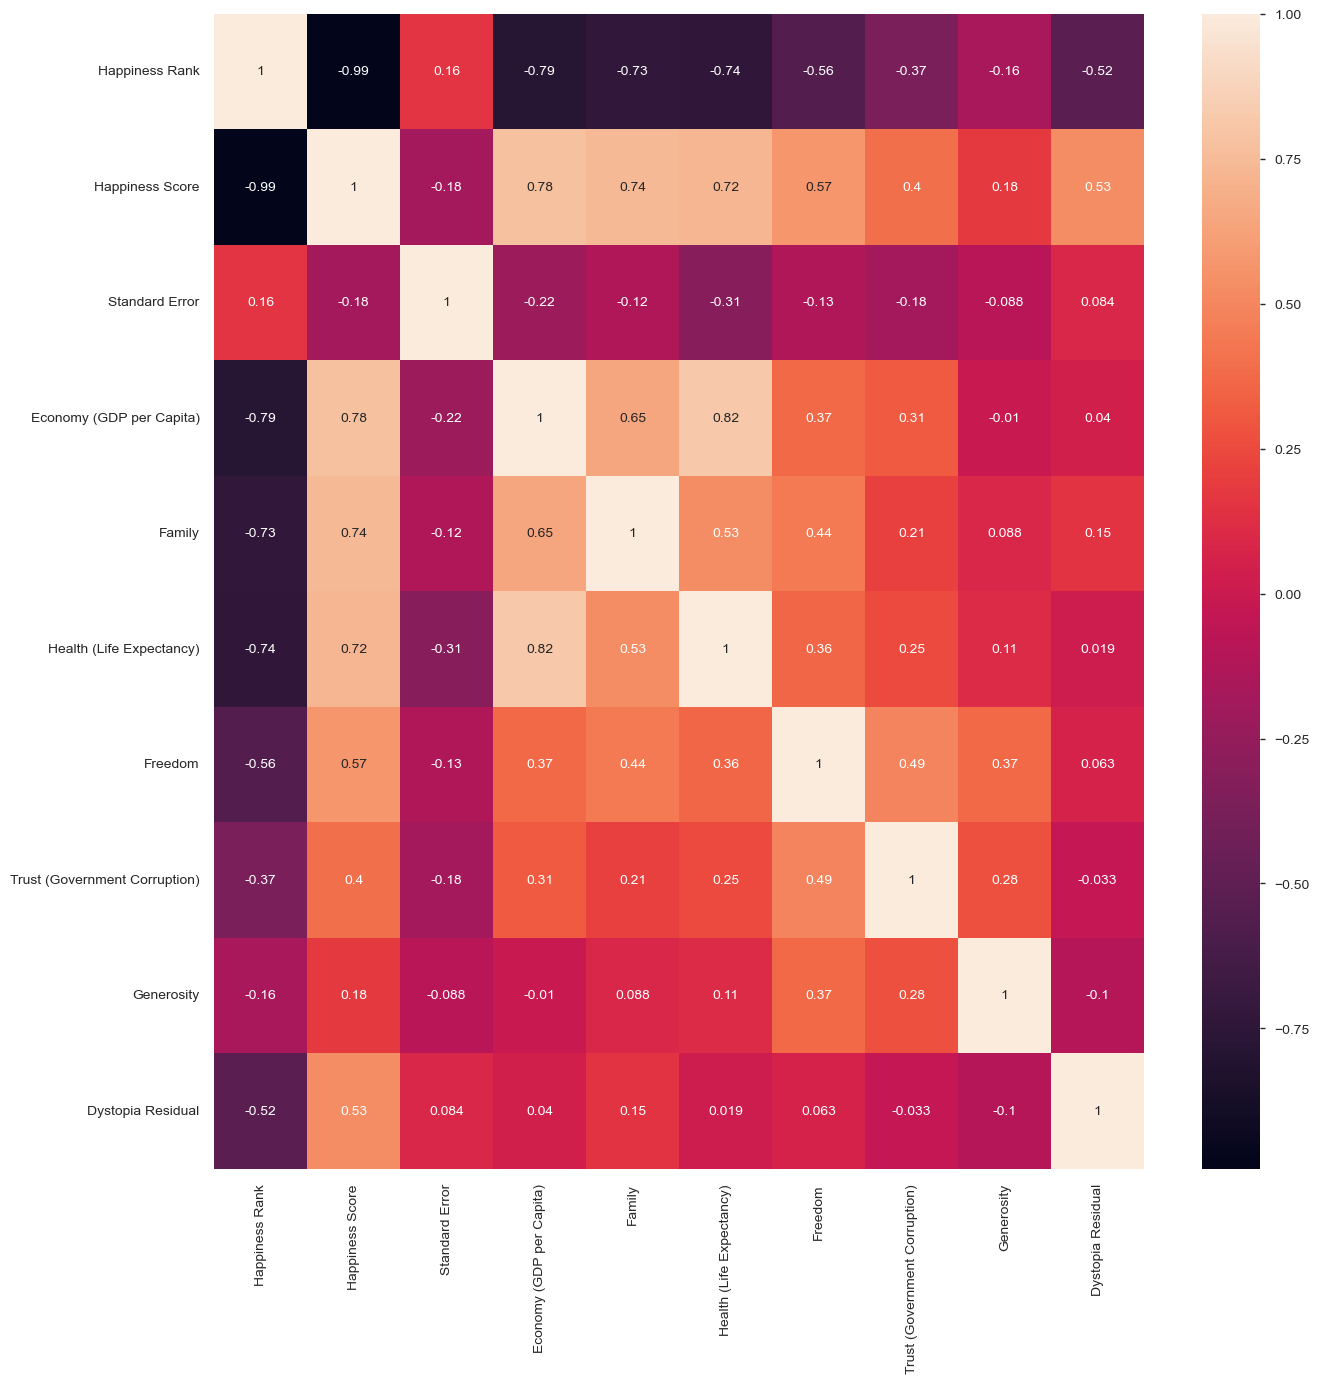

In [43]:
plt.figure(figsize=(15,15))
corrMatrix=df.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [22]:
df.nlargest(3, 'Economy (GDP per Capita)').iloc[:,[0,1,5,3]]


,Country,Region,Economy (GDP per Capita),Happiness Score
27,Qatar,Middle East and Northern Africa,1.69042,6.611
16,Luxembourg,Western Europe,1.56391,6.946
38,Kuwait,Middle East and Northern Africa,1.55422,6.295


In [24]:
df.nsmallest(3, 'Economy (GDP per Capita)').iloc[:,[0,1,5,3]]

,Country,Region,Economy (GDP per Capita),Happiness Score
119,Congo (Kinshasa),Sub-Saharan Africa,0.00000,4.517
156,Burundi,Sub-Saharan Africa,0.01530,2.905
130,Malawi,Sub-Saharan Africa,0.01604,4.292


In [25]:
df.nlargest(3, 'Family').iloc[:,[0,1,6,3]]

,Country,Region,Family,Happiness Score
1,Iceland,Western Europe,1.40223,7.561
17,Ireland,Western Europe,1.36948,6.940
2,Denmark,Western Europe,1.36058,7.527


In [26]:
df.nsmallest(3, 'Family').iloc[:,[0,1,6,3]]

,Country,Region,Family,Happiness Score
147,Central African Republic,Sub-Saharan Africa,0.00000,3.678
157,Togo,Sub-Saharan Africa,0.13995,2.839
152,Afghanistan,Southern Asia,0.30285,3.575


In [28]:
df.nlargest(3, 'Health (Life Expectancy)').iloc[:,[0,1,7,3]]

,Country,Region,Health (Life Expectancy),Happiness Score
23,Singapore,Southeastern Asia,1.02525,6.798
71,Hong Kong,Eastern Asia,1.01328,5.474
45,Japan,Eastern Asia,0.99111,5.987


In [29]:
df.nsmallest(3, 'Health (Life Expectancy)').iloc[:,[0,1,7,3]]

,Country,Region,Health (Life Expectancy),Happiness Score
122,Sierra Leone,Sub-Saharan Africa,0.00000,4.507
127,Botswana,Sub-Saharan Africa,0.04776,4.332
147,Central African Republic,Sub-Saharan Africa,0.06699,3.678


In [30]:
df.nlargest(3, 'Freedom').iloc[:,[0,1,8,3]]

,Country,Region,Freedom,Happiness Score
3,Norway,Western Europe,0.66973,7.522
0,Switzerland,Western Europe,0.66557,7.587
144,Cambodia,Southeastern Asia,0.66246,3.819


In [37]:
df.nsmallest(3, 'Freedom').iloc[:,[0,1,8,3,9]]

,Country,Region,Freedom,Happiness Score,Trust (Government Corruption)
111,Iraq,Middle East and Northern Africa,0.00000,4.677,0.13788
101,Greece,Western Europe,0.07699,4.857,0.01397
95,Bosnia and Herzegovina,Central and Eastern Europe,0.09245,4.949,0.00227


In [33]:
df.nlargest(3, 'Trust (Government Corruption)').iloc[:,[0,1,9,3,8]]

,Country,Region,Trust (Government Corruption),Happiness Score,Freedom
153,Rwanda,Sub-Saharan Africa,0.55191,3.465,0.59201
27,Qatar,Middle East and Northern Africa,0.52208,6.611,0.64040
23,Singapore,Southeastern Asia,0.49210,6.798,0.54252


In [39]:
df.nsmallest(15, 'Trust (Government Corruption)').iloc[:,[0,1,9,3]]

,Country,Region,Trust (Government Corruption),Happiness Score
73,Indonesia,Southeastern Asia,0.00000,5.399
95,Bosnia and Herzegovina,Central and Eastern Europe,0.00227,4.949
85,Romania,Central and Eastern Europe,0.00649,5.124
133,Bulgaria,Central and Eastern Europe,0.00872,4.218
55,Lithuania,Central and Eastern Europe,0.01031,5.833
87,Portugal,Western Europe,0.01078,5.102
40,Trinidad and Tobago,Latin America and Caribbean,0.01140,6.168
101,Greece,Western Europe,0.01397,4.857
51,Moldova,Central and Eastern Europe,0.01615,5.889
64,Jamaica,Latin America and Caribbean,0.02299,5.709


In [41]:
df.nlargest(4, 'Generosity').iloc[:,[0,1,5,10,3]]

,Country,Region,Economy (GDP per Capita),Generosity,Happiness Score
128,Myanmar,Southeastern Asia,0.27108,0.79588,4.307
33,Thailand,Southeastern Asia,0.96690,0.57630,6.455
20,United Kingdom,Western Europe,1.26637,0.51912,6.867
36,Malta,Western Europe,1.20740,0.51752,6.302


In [42]:
df.nsmallest(10, 'Generosity').iloc[:,[0,1,10,3]]

,Country,Region,Generosity,Happiness Score
101,Greece,Western Europe,0.00000,4.857
63,Russia,Central and Eastern Europe,0.00199,5.716
55,Lithuania,Central and Eastern Europe,0.02641,5.833
61,Croatia,Central and Eastern Europe,0.05444,5.759
129,Georgia,Central and Eastern Europe,0.05547,4.297
22,Venezuela,Latin America and Caribbean,0.05841,6.810
106,Tunisia,Middle East and Northern Africa,0.06431,4.739
142,Gabon,Sub-Saharan Africa,0.06822,3.896
91,Morocco,Middle East and Northern Africa,0.07172,5.013
79,Azerbaijan,Central and Eastern Europe,0.07799,5.212


In [ ]:
#Findings from analysing the explanatory factors in 2015 only
1- Trust (Government Corruption):

Rwanda is an extreme outlier with 0.55191 corresponding to to a happiness index of merely 3.465. On the other hand, countries like Trinidad and Tobago and Moldova surprisingly scored low

2- Generosity:

The people of Myanmar believe the are quite generous (0.79588, way bigger than secondly Thailand) despite their happinesses indicator of less than 5. Venezuela's happiness index is 6.810 when generousity is quite low

3- Freedom:

Cambodia has a high freedom result of 0.66246 relative to a low score of 3.819. Similarly, we observe Rwandan are largely satisfied with freedom 0.59201 despite low happiness overall (3.465)